----
# <b>Mini Project ML for Time Series</b>
# Matteo MARENGO | matteo.marengo@ens-paris-saclay.fr
# Hugo ROBERT | hugo.robert@ens-paris-saclay.fr
----

----
----
# <b>1 : Time series feature extraction: Fourier and Wavelet transform  </b>
Use case: ECG classification
<a href = "https://tkhan11.github.io/blog/timeSeriesFeatExt.html">Check this blog ! </a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scaleogram
!pip install mat4py

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import pywt
import seaborn as sns
import scaleogram as scg
import matplotlib.pyplot as plt
import matplotlib.gridspec as GridSpec
from mat4py import loadmat
from scipy.fftpack import fft

In [ ]:
# source : 'https://www.mathworks.com/help/wavelet/examples/signal-classification-with-wavelet-analysis-and-convolutional-neural-networks.html'
# Create list of data and labels from dictionary
data = loadmat("/content/drive/MyDrive/MVA-2023-2024/TIME_SERIES/TSFEL-LIBRARY/ECG/ECGData/ECGData.mat")

ecg_total = len(data['ECGData']['Data'])
ecg_data = []
ecg_labels = []
for i in range(0, ecg_total):
    ecg_data.append(data['ECGData']['Data'][i])
    ecg_labels.append(data['ECGData']['Labels'][i])

flat_list_ecg_labels = [item for sublist in ecg_labels for item in sublist]

Text(0.5, 1.0, 'NSR Signal')

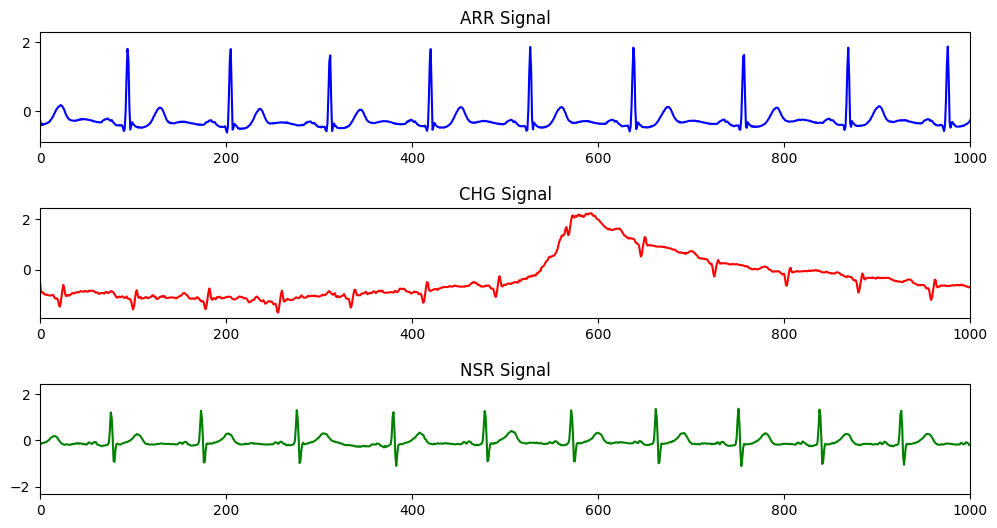

In [ ]:
# Data Visualization

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(3, 1, hspace=0.6)

arr_signal = fig.add_subplot(grid[0, 0])
chg_signal = fig.add_subplot(grid[1, 0])
nsr_signal = fig.add_subplot(grid[2, 0])

arr_signal.plot(range(0, len(data['ECGData']['Data'][33]), 1), ecg_data[33], color = 'blue')
arr_signal.set_xlim(0, 1000)
arr_signal.set_title('ARR Signal')

chg_signal.plot(range(0, len(data['ECGData']['Data'][100]), 1), ecg_data[100], color = 'red')
chg_signal.set_xlim(0, 1000)
chg_signal.set_title('CHG Signal')

nsr_signal.plot(range(0, len(data['ECGData']['Data'][150]), 1), ecg_data[150], color = 'green')
nsr_signal.set_xlim(0, 1000)
nsr_signal.set_title('NSR Signal')

#fig.savefig('Figure_1.png')   # save the figure to file
#plt.close(fig)

In [ ]:
#Sythetic data generation and FFT

N = 10000
x_values = np.linspace(0, 100, N)
amplitudes = [4, 1.5, 9]
frequencies = [2, 5, 3]
y_values_0 = amplitudes[0]*np.cos(2*np.pi*frequencies[0]*x_values)
y_values_1 = amplitudes[1]*np.sin(2*np.pi*frequencies[1]*x_values)
y_values_2 = amplitudes[2]*np.cos(2*np.pi*frequencies[2]*x_values + 0.4)


full_signal_values = (y_values_0 + y_values_1 - y_values_2)
full_signal_fft_values = fft(full_signal_values)
full_signal_fft_values = (2/N) * np.abs(full_signal_fft_values)

Text(8, 3, 'Second\ncomponent')

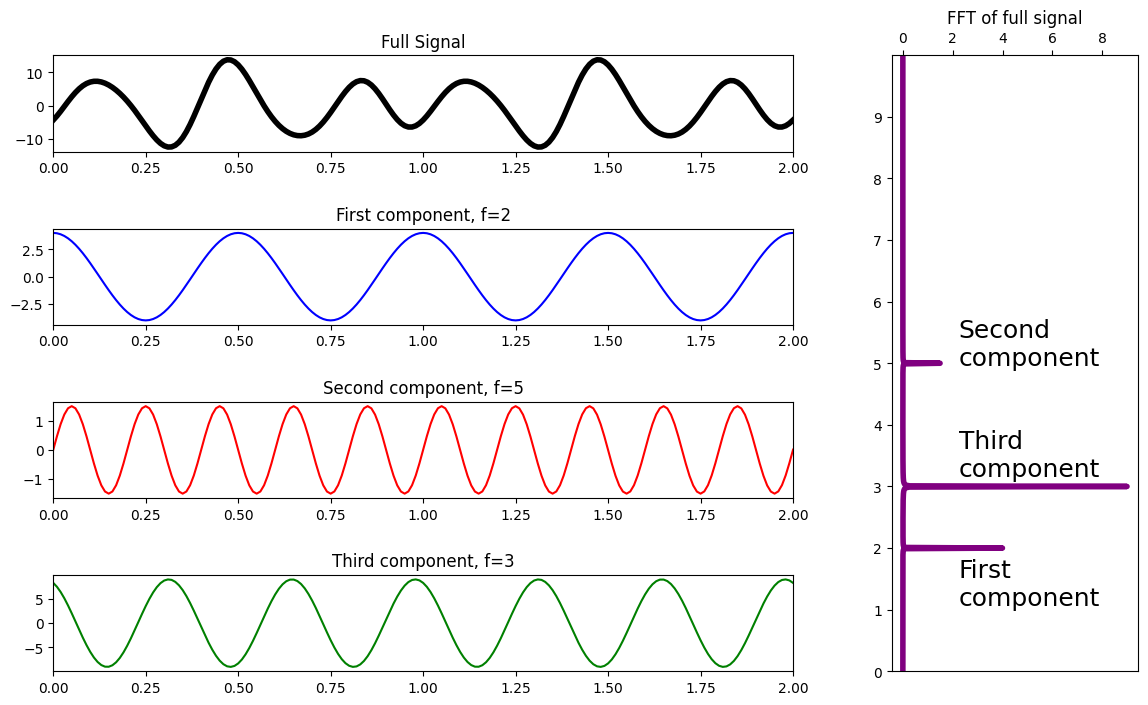

In [ ]:
# Plot FFT results of synthetic data

fig = plt.figure(figsize=(14, 8))
widths = [3, 1]
heights = [1, 1, 1, 1]
grid = plt.GridSpec(4, 2, wspace=0.2, hspace=0.8, width_ratios=widths, height_ratios=heights)

full_signal = fig.add_subplot(grid[0, 0])
first_comp = fig.add_subplot(grid[1, 0])
second_comp = fig.add_subplot(grid[2, 0])
third_comp = fig.add_subplot(grid[3, 0])
fft_result = fig.add_subplot(grid[0:, 1])

#Synthetic data
full_signal.plot(list(x_values), list(full_signal_values), color='black', linewidth=4)
full_signal.set_xlim(0, 2)
full_signal.set_title('Full Signal')
first_comp.plot(list(x_values), list(y_values_0), color = 'blue')
first_comp.set_xlim(0, 2)
first_comp.set_title('First component, f=2')
second_comp.plot(list(x_values), list(y_values_1), color = 'red')
second_comp.set_xlim(0, 2)
second_comp.set_title('Second component, f=5')
third_comp.plot(list(x_values), list(y_values_2), color = 'green')
third_comp.set_xlim(0, 2)
third_comp.set_title('Third component, f=3')

#FFT
fft_result.xaxis.tick_top()
fft_result.plot(list(full_signal_fft_values), list(x_values), color = 'purple', linewidth=4)
fft_result.set_ylim(0, 10)
fft_result.set_yticks(np.arange(0, 10, step=1))
fft_result.set_title('FFT of full signal')
fft_result.annotate('First\ncomponent',
            xy=(1.8, 1), xycoords='data',
            xytext=(8, 3), textcoords='offset points',
            size=18)
fft_result.annotate('Third\ncomponent',
            xy=(1.8, 3.1), xycoords='data',
            xytext=(8, 3), textcoords='offset points',
            size=18)

fft_result.annotate('Second\ncomponent',
            xy=(1.8, 4.9), xycoords='data',
            xytext=(8, 3), textcoords='offset points',
            size=18)

#fig.savefig('Figure_2.png')   # save the figure to file
#plt.close(fig)

Text(0.5, 1.0, 'FFT of full signal')

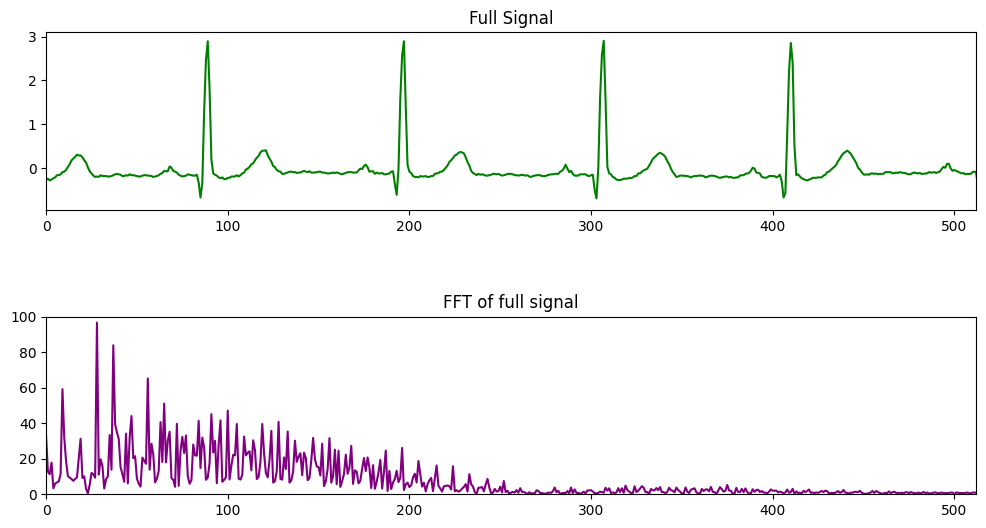

In [ ]:
#Arr signal Fourier Transform
nn = 160
signal_length = 1000
full_signal_fft_values = np.abs(fft(ecg_data[nn][:signal_length]))
x_values_fft = range(0, len(data['ECGData']['Data'][nn]), 1)[:signal_length]

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(2, 1,hspace=0.6)

full_signal = fig.add_subplot(grid[0, 0])
fft_comp = fig.add_subplot(grid[1, 0])

full_signal.plot(x_values_fft, ecg_data[nn][:signal_length], color = 'green')
full_signal.set_xlim(0, 512)
full_signal.set_title('Full Signal')
fft_comp.plot(x_values_fft, list(full_signal_fft_values), color = 'purple')
fft_comp.set_xlim(0, 512)
fft_comp.set_ylim(0, 100)
fft_comp.set_title('FFT of full signal')

#fig.savefig('Figure_3.png')   # save the figure to file
#plt.close(fig)

**Fourier Transform**

\begin{equation*}
F(k)= \int_{-\infty}^{+\infty} e^{-2\pi ikt} x(t) dt
\end{equation*}

## Wavelet

TypeError: ignored

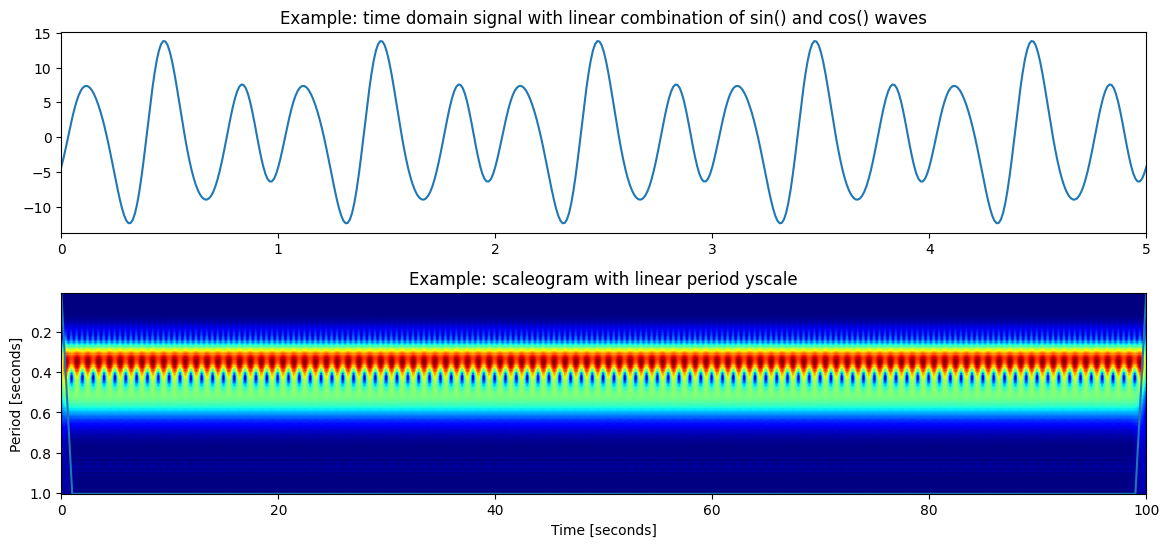

In [ ]:
# Example of Wavelet transform for Synthetic data
N = 10000
x_values_wvt = np.linspace(0, 100, N)
amplitudes = [4, 1.5, 9]
frequencies = [2, 5, 3]
y_values_0 = amplitudes[0]*np.cos(2*np.pi*frequencies[0]*x_values)
y_values_1 = amplitudes[1]*np.sin(2*np.pi*frequencies[1]*x_values)
y_values_2 = amplitudes[2]*np.cos(2*np.pi*frequencies[2]*x_values + 0.4)
full_signal_values = (y_values_0 + y_values_1 - y_values_2)

wavelet='cmor0.7-1.5'

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6))
fig.subplots_adjust(hspace=0.3)
ax1.plot(x_values_wvt, full_signal_values); ax1.set_xlim(0, 5)
ax1.set_title('Example: time domain signal with linear combination of sin() and cos() waves')
ax2 = scg.cws(x_values_wvt, full_signal_values, scales=np.arange(1, 150), wavelet=wavelet,
        ax=ax2, cmap="jet", cbar=None, ylabel="Period [seconds]", xlabel="Time [seconds]",
        title='Example: scaleogram with linear period yscale')


### Wavelet transform

\begin{equation*}
 S(a, b)  =  \frac{1}{\sqrt a} \int_{-\infty}^{+\infty} x(t) \bar{\phi}(\frac{t-b}{a}) dt
\end{equation*}

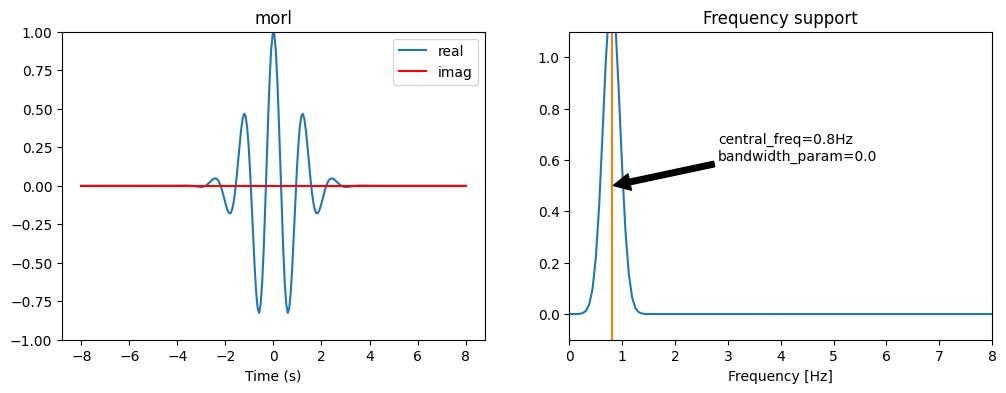

In [ ]:
#Morlet wavelet
axes = scg.plot_wav('morl', figsize=(12,4))

### Wavelet family

In [ ]:
pywt.families(False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

**Family of Wavelets :**   
'Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets'.


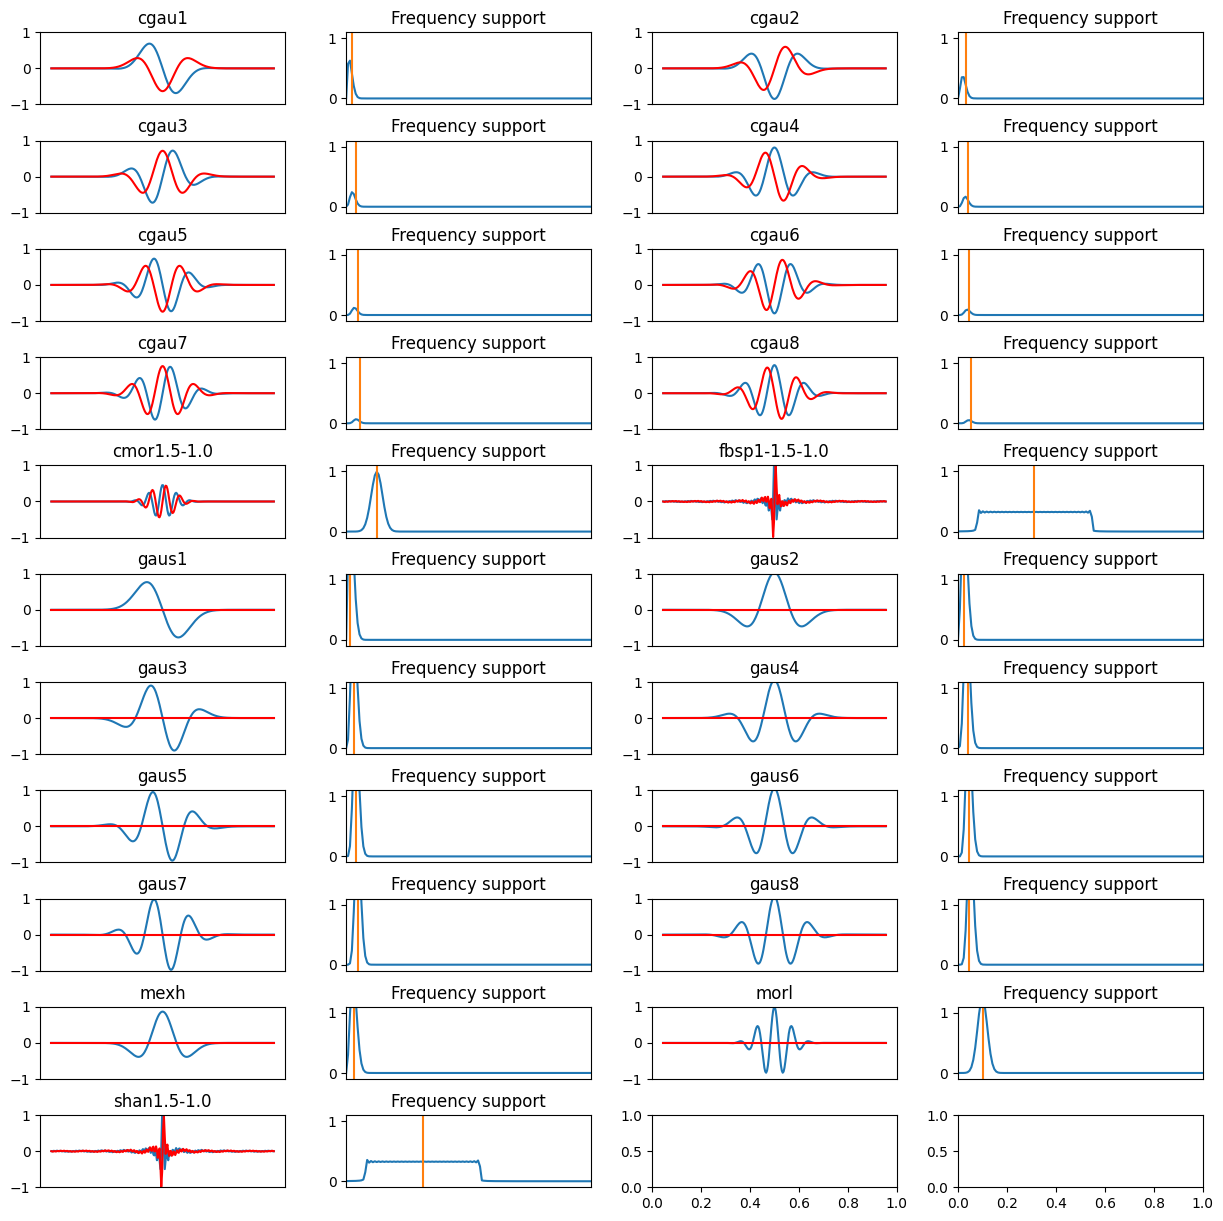

In [ ]:
scg.plot_wavelets(figsize=(15,15))

----
----
# <b> 2 : Scaleogram</b>

Default wavelet function used to compute the transform: morl ( Morlet wavelet )


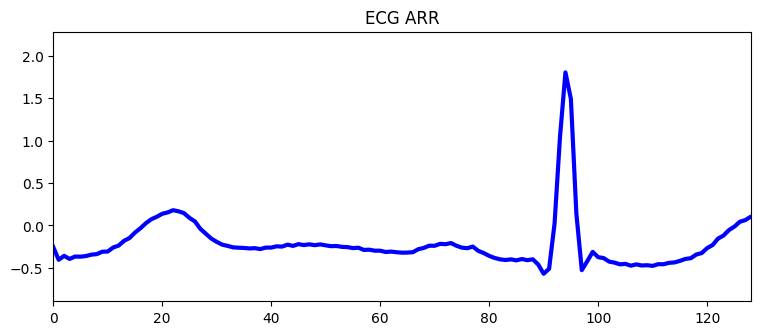

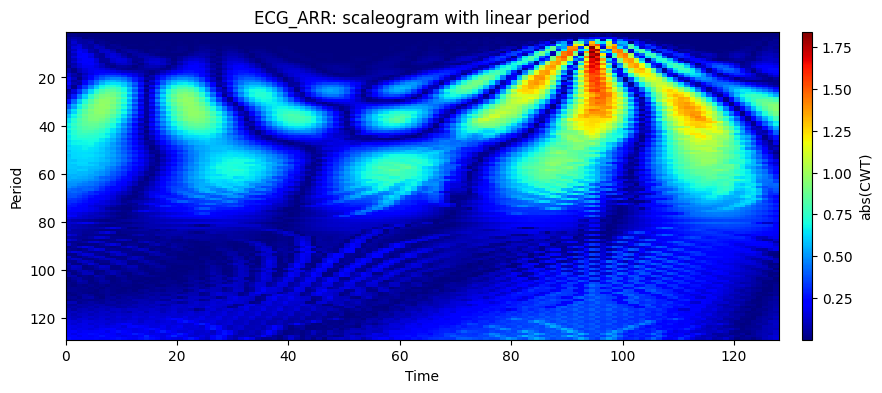

In [ ]:
# choose default wavelet function
scg.set_default_wavelet('morl')

nn = 33
signal_length = 128
# range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, signal_length+1) )
x_values_wvt_arr = range(0,len(ecg_data[nn]),1)

# plot the signal
fig1, ax1 = plt.subplots(1, 1, figsize=(9, 3.5));
ax1.plot(x_values_wvt_arr, ecg_data[nn], linewidth=3, color='blue')
ax1.set_xlim(0, signal_length)
ax1.set_title("ECG ARR")

# the scaleogram
scg.cws(ecg_data[nn][:signal_length], scales=scales, figsize=(10, 4.0), coi = False, ylabel="Period", xlabel="Time",
        title='ECG_ARR: scaleogram with linear period');

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")



https://docs.scipy.org/doc/scipy/reference/signal.html   #window-functions

----
----
# <b> 3 : Classification</b>

In [ ]:
#Preparing data
arr_list = ecg_data[0:95]
chf_list = ecg_data[96:125]
nsr_list = ecg_data[126:162]

arr_split_256 = [np.array_split(arr_list[ii], 256) for ii in range(95)]
arr_flatten = [item for sublist in arr_split_256 for item in sublist]

chf_split_256 = [np.array_split(chf_list[ii], 256) for ii in range(29)]
chf_flatten = [item for sublist in chf_split_256 for item in sublist]

nsr_split_256 = [np.array_split(nsr_list[ii], 256) for ii in range(36)]
nsr_flatten = [item for sublist in nsr_split_256 for item in sublist]

In [ ]:
reduce_size = 500
full_1500 = (arr_flatten[0:reduce_size] + chf_flatten[0:reduce_size] + nsr_flatten[0:reduce_size])

In [ ]:
# create the data set
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


fs = len(full_1500[0])
sgn_length = 2000   #65536   Pay atention with ram memory!
size_dataset = len(full_1500)
scales = range(1, fs)
waveletname = 'morl'

X_full = np.ndarray(shape=(size_dataset, fs-1, fs-1, 3))

for i in range(0, size_dataset):
    if i % 500 == 0:
        print (i, 'done!')
    for j in range(0, 3):
        signal = full_1500[i]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        X_full[i, :, :, j] = coeff[:,:fs-1]

0 done!
500 done!
1000 done!


In [ ]:
list_ecg_labels_arr = ['ARR']*reduce_size
list_ecg_labels_chf = ['CHF']*reduce_size
list_ecg_labels_nsr = ['NSR']*reduce_size
list_ecg_labels = (list_ecg_labels_arr + list_ecg_labels_chf + list_ecg_labels_nsr)

le = preprocessing.LabelEncoder()
ecg_labels_encoded = le.fit_transform(list_ecg_labels)
X_train, X_test, y_train, y_test = train_test_split(X_full, ecg_labels_encoded, test_size=0.25, random_state=42)

In [ ]:
print(type(X_train))
print(X_train.shape)
print(X_full.shape)
print(len(full_1500))
print(len(full_1500[0]))

<class 'numpy.ndarray'>
(1125, 255, 255, 3)
(1500, 255, 255, 3)
1500
256


----
----
# <b> 4 : Training the ECG classifier with scaleograms</b>

In [ ]:
import sys
from tensorflow import keras

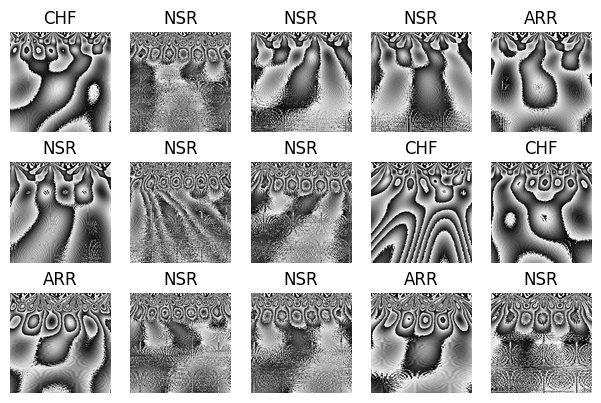

In [ ]:
#Inspecting DATA
n_rows = 3
n_cols = 5
class_names = ['ARR', 'CHF', 'NSR']
plt.figure(figsize=(n_cols*1.5, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow((X_train[index]*255).astype(np.uint8), cmap="binary", interpolation="spline36")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

In [ ]:
# Defining basic NN
num_filter, num_classes = 3, 3
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[fs-1, fs-1, num_filter]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(num_classes, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", metrics=["accuracy"])

In [ ]:
list_ecg_labels_arr = ['ARR']*reduce_size
list_ecg_labels_chf = ['CHF']*reduce_size
list_ecg_labels_nsr = ['NSR']*reduce_size
list_ecg_labels = (list_ecg_labels_arr + list_ecg_labels_chf + list_ecg_labels_nsr)

le = preprocessing.LabelEncoder()
ecg_labels_encoded = le.fit_transform(list_ecg_labels)
X_train, X_test, y_train, y_test = train_test_split(freq_features, ecg_labels_encoded, test_size=0.25, random_state=42)

----
----
# <b> 5 : TSFEL extraction </b>


In [ ]:
!pip install tsfel
!pip install cesium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 786.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 672.6/672.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.5/554.5 kB 31.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 5.3 MB/s eta 0:00:00
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43804 sha256=e518597b17ec36e5a4d387375a5bdb05413c0b424e2dd4c49a1d965a1917351b
  Stored in directory: /root/.cache/pip/wheels/13/39/c2/d113611d276bf55252ed5a640e98596d7dcc96535afbf254d5
Successfully built gatspy


In [ ]:
# create the data set
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tsfel


fs = len(full_1500[0])
sgn_length = 2000   #65536   Pay atention with ram memory!
size_dataset = len(full_1500)
scales = range(1, fs)
waveletname = 'morl'

cfg_file = tsfel.get_features_by_domain()
TSFEL_Features = tsfel.time_series_features_extractor(cfg_file, ecg_data,fs=128)

*** Feature extraction started ***



*** Feature extraction finished ***


In [ ]:
print(TSFEL_Features.shape)

(162, 389)


In [ ]:
list_ecg_labels_arr = ['ARR']*reduce_size
list_ecg_labels_chf = ['CHF']*reduce_size
list_ecg_labels_nsr = ['NSR']*reduce_size
list_ecg_labels = (list_ecg_labels_arr + list_ecg_labels_chf + list_ecg_labels_nsr)

le = preprocessing.LabelEncoder()
# ecg_labels_encoded = le.fit_transform(list_ecg_labels)
ecg_labels_encoded = le.fit_transform(list(ecg_labels))
X_train, X_test, y_train, y_test = train_test_split(TSFEL_Features, ecg_labels_encoded, test_size=0.25, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(type(X_train))
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(len(full_1500))
print(len(full_1500[0]))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(121, 389)
(41, 389)
(121,)
(41,)
1500
256


----
----
# <b> 6 : CESIUM extraction</b>

In [ ]:
from cesium import featurize

features_to_use = [
    "amplitude",
    "percent_beyond_1_std",
    "maximum",
    "max_slope",
    "median",
    "median_absolute_deviation",
    "percent_close_to_median",
    "minimum",
    "skew",
    "std",
    "weighted_average",
]

time_points = [np.arange(len(ts)) / fs for ts in full_1500]

freq_features = featurize.featurize_time_series(times=time_points,
                                                  values=full_1500,
                                                  features_to_use=features_to_use)

In [ ]:
print(freq_features.shape)

(1500, 11)


In [ ]:
list_ecg_labels_arr = ['ARR']*reduce_size
list_ecg_labels_chf = ['CHF']*reduce_size
list_ecg_labels_nsr = ['NSR']*reduce_size
list_ecg_labels = (list_ecg_labels_arr + list_ecg_labels_chf + list_ecg_labels_nsr)

le = preprocessing.LabelEncoder()
ecg_labels_encoded = le.fit_transform(list_ecg_labels)
X_train, X_test, y_train, y_test = train_test_split(freq_features, ecg_labels_encoded, test_size=0.25, random_state=42)

In [ ]:
print(type(X_train))
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(len(full_1500))
print(len(full_1500[0]))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1125, 11)
(375, 11)
(1125,)
(375,)
1500
256


----
----
# <b>7 : TSFRESH extraction</b>


In [ ]:
# Assuming time_series_list and time_list are defined as follows:
time_series_list = ecg_data
ts = 1/128
times_list = []
for i in range(162):
  times_list.append(ts*j for j in range(len(ecg_data[0])))

data = []

# Iterate over each time series and its corresponding time list
for i, (series, times) in enumerate(zip(time_series_list, times_list)):
    # if len(series) != len(times):
    #     raise ValueError(f"Length mismatch in series {i}: {len(series)} measurements, {len(times)} time points.")

    # Pair each time point with its corresponding value
    for time_value, value in zip(times, series):
        data.append({'id': i, 'time': time_value, 'value': value})

# Creating the DataFrame
df = pd.DataFrame(data)

print(len(df))
print(df.head)
print(df.shape)

10616832
<bound method NDFrame.head of            id        time     value
0           0    0.000000 -0.097857
1           0    0.007812 -0.156881
2           0    0.015625 -0.137816
3           0    0.023438 -0.137177
4           0    0.031250 -0.147684
...       ...         ...       ...
10616827  161  511.960938 -0.275000
10616828  161  511.968750 -0.275000
10616829  161  511.976562 -0.225000
10616830  161  511.984375 -0.275000
10616831  161  511.992188 -0.205000

[10616832 rows x 3 columns]>
(10616832, 3)


In [ ]:
print(len(ecg_data))

162


In [ ]:
print(len(times_list))

162


In [ ]:
!pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
from tsfresh.feature_extraction import MinimalFCParameters,EfficientFCParameters,ComprehensiveFCParameters
from tsfresh import select_features,extract_features,extract_relevant_features
from tsfresh.utilities.dataframe_functions import impute
# Use MinimalFCParameters
extraction_settings = MinimalFCParameters()

# Feature extraction with error handling and progress information
try:
    fset_tsfresh_mini = extract_features(df, column_id='id', column_sort='time', column_value='value',
                                    default_fc_parameters=extraction_settings,
                                    impute_function=impute,
                                    )

    print("Feature set type:", type(fset_tsfresh_mini))
    print("Number of features extracted:", len(fset_tsfresh_mini.columns))
    print("Shape of the feature set:", fset_tsfresh_mini.shape)

    # Optionally, save the feature set to a file
    # fset_tsfresh.to_csv('feature_set.csv')

except Exception as e:
    print(f"An error occurred during feature extraction: {e}")

Feature Extraction: 100%|██████████| 162/162 [00:02<00:00, 70.01it/s] 


Feature set type: <class 'pandas.core.frame.DataFrame'>
Number of features extracted: 10
Shape of the feature set: (162, 10)


----
----
# <b> 8 : NN and classification </b>

In [ ]:
# Defining basic NN
num_filter, num_classes = 3, 3
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[11]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(num_classes, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 195075)            0         
                                                                 
 dense_24 (Dense)            (None, 300)               58522800  
                                                                 
 dense_25 (Dense)            (None, 100)               30100     
                                                                 
 dense_26 (Dense)            (None, 3)                 303       
                                                                 
Total params: 58553203 (223.36 MB)
Trainable params: 58553203 (223.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Install pydot and graphviz for `pydotprint` to work

keras.utils.plot_model(model, "my_model.png", show_shapes=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
36/36 [==============================] - 1s 10ms/step - loss: 1.0985 - accuracy: 0.3422 - val_loss: 1.1007 - val_accuracy: 0.3067
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 1.0985 - accuracy: 0.3422 - val_loss: 1.1008 - val_accuracy: 0.3067
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: 1.0985 - accuracy: 0.3422 - val_loss: 1.1007 - val_accuracy: 0.3067
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 1.0985 - accuracy: 0.3422 - val_loss: 1.1006 - val_accuracy: 0.3067
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 1.0985 - accuracy: 0.3422 - val_loss: 1.1006 - val_accuracy: 0.3067
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 1.0985 - accuracy: 0.3422 - val_loss: 1.1006 - val_accuracy: 0.3067
Epoch 7/100
36/36 [==============================] - 0s 5ms/step - loss: 1.0985 - accuracy: 0.3422 - val_loss: 1.1005 - val_accuracy: 0.3067
Epoch 8/100


In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.9536 - accuracy: 0.6098


[0.9536199569702148, 0.6097561120986938]

In [ ]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(max_depth=20, random_state=0).fit(X_train.flatten(), y_train)
y_pred = clf.predict(X_test.flatten())
print('\033[32m' + 'Accuracy score with RF: '+str(accuracy_score(y_test, y_pred)) + '\033[0m')

NameError: ignored

In [ ]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.xlabel('epochs', size = 16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig('Figure_epochs.png')
    plt.show()

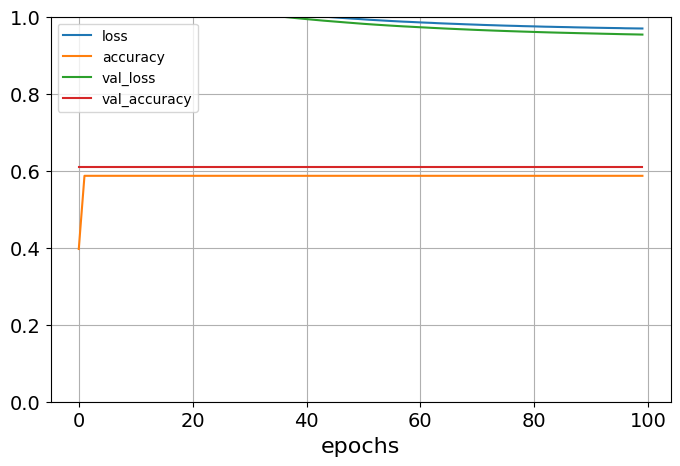

In [ ]:
plot_learning_curves(history)
plt.show()

In [ ]:
prediction = model.predict(X_test)
pred_classes = prediction.argmax(axis=1)

12/12 [==============================] - 0s 15ms/step


In [ ]:
# Confusion Matrix With Scikit
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_classes)
cm_norm =  cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

Text(253.72222222222234, 0.5, 'True')

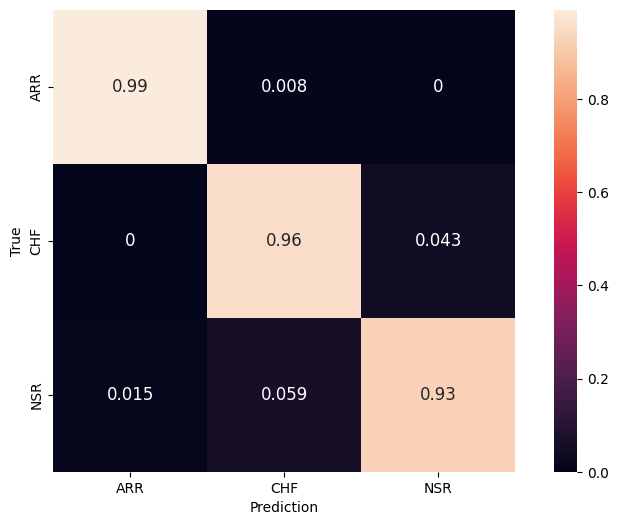

In [ ]:
# Ploting Confusion Matrix

df_cm = pd.DataFrame(cm_norm, ['ARR', 'CHF', 'NSR'], ['ARR', 'CHF', 'NSR'])
plt.figure(figsize = (10,6))
conf = sns.heatmap(df_cm, annot=True, square=True, annot_kws={"size": 12})
conf.set_xlabel('Prediction')
conf.set_ylabel('True')